In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value
from astropy import constants as const

In [18]:
import h5py    
import numpy as np    
import pandas as pd
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u
from astropy import constants as const

In [7]:
import Merger_rate_plot as merg

In [8]:
zmax = 7
zbinsize = 0.2
lgzbinsize=0.15
lgzmin=-3.0
lgzmax = 1.0

In [9]:
merger_rate,lgzbins_binary,dNdlogzdt_binary = merg.merger_rate_log_plot(z_bh,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax)

total merger rate (yr^-1):  0.18774290708893313


In [10]:
merger_rate = np.sum(dNdlogzdt_binary*lgzbinsize)
print(merger_rate)

0.050839101292491425


In [11]:
df_trip = pd.read_csv("Data/triples-data-with-flags.csv",index_col= False)
df_trip.head()

,Unnamed: 0,Mass 1,Mass 2,Mass 3,t_merger,Flag
0,0,2.150737e+07,8.204738e+06,5.276829e+07,1.985633e+09,No
1,1,1.546540e+08,4.211761e+07,3.132749e+08,5.529691e+09,Tr
2,2,1.546540e+08,4.211761e+07,3.132749e+08,3.025313e+09,No
3,3,1.546540e+08,4.211761e+07,3.132749e+08,1.972738e+09,No
4,4,9.436961e+06,1.002870e+06,4.551391e+08,4.814316e+09,No


In [12]:
t_merger_triples = df_trip[(df_trip["Flag"] == "Tr-ej") | (df_trip["Flag"] == "Tr")]["t_merger"].to_numpy()

In [13]:
#t_triple = np.loadtxt("Data/t_merger2.txt")

In [14]:
#age_of_the_universe = cosmo.age(0).to(u.yr).value
# #t_triple = t_merger_triples[np.argwhere(t_merger_triples < age_of_the_universe)]

In [15]:
z_bh_trip = z_at_value(cosmo.age, (t_merger_triples/10**9)*u.Gyr,zmin=1e-9)
z_bh_trip = np.array(z_bh_trip)

In [16]:
merger_rate_trip,lgzbins_trip,dNdlogzdt_trip = merg.merger_rate_log_plot(z_bh_trip,zmax,0.2,0.3,lgzmin,lgzmax)

total merger rate (yr^-1):  0.012404593093510241


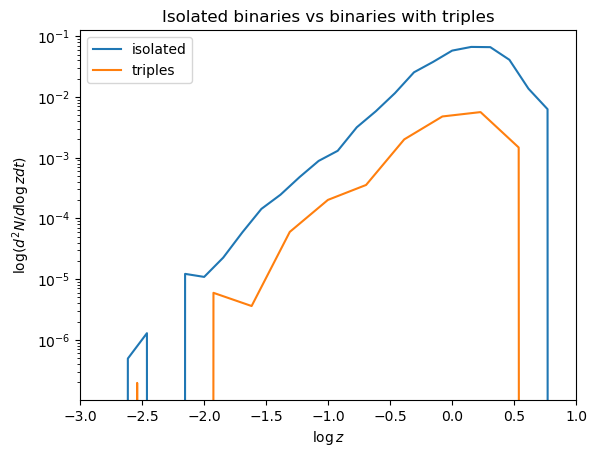

In [17]:
plt.plot(lgzbins_binary,dNdlogzdt_binary,label="isolated")
plt.plot(lgzbins_trip,dNdlogzdt_trip,label="triples")
plt.yscale("log")
plt.legend()
plt.xlim(-3,1)
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt)$")
plt.title("Isolated binaries vs binaries with triples")
plt.savefig("Figures/isolated-vs-triples.pdf")